<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/US_SRAD_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표 : 초음파 특유의 고주파 노이즈(speckle noise)를 감소시키면서도 중요한 경계와 조직 구조를 보존하는 것**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [3]:
# 2. 초음파 이미지 로드
image_path = '/content/drive/MyDrive/Medical_CV/Ultrasound (US)/US 이미지/benign (107).png'  # 이미지 경로 설정
us_image = io.imread(image_path, as_gray=True)

In [4]:
#  원본 이미지 데이터 확인
print(f"Original us_image - Min Value: {us_image.min()}, Max Value: {us_image.max()}")
print(f"Original us_image - Data Type: {us_image.dtype}")
print(f"Original us_image - Shape: {us_image.shape}")

Original us_image - Min Value: 0.0, Max Value: 1.0
Original us_image - Data Type: float64
Original us_image - Shape: (616, 759)


In [5]:
# 1. SRAD 필터 함수 직접 정의
def srad_filter(img, num_iterations=50, delta_t=0.1, lambda_param=0.25):
    # 초기 설정
    img = img.astype(np.float32)
    diffused_img = img.copy()

    # SRAD 알고리즘 반복 적용
    for _ in range(num_iterations):
        # 이미지의 x, y 방향 미분 계산
        img_north = np.roll(diffused_img, -1, axis=0)
        img_south = np.roll(diffused_img, 1, axis=0)
        img_east = np.roll(diffused_img, -1, axis=1)
        img_west = np.roll(diffused_img, 1, axis=1)

        # 각 방향의 그라디언트 계산
        gradient_north = img_north - diffused_img
        gradient_south = img_south - diffused_img
        gradient_east = img_east - diffused_img
        gradient_west = img_west - diffused_img

        # 경계 민감도 함수 적용
        c_north = np.exp(-(gradient_north ** 2) / (lambda_param * (np.mean(gradient_north ** 2) + 1e-5)))
        c_south = np.exp(-(gradient_south ** 2) / (lambda_param * (np.mean(gradient_south ** 2) + 1e-5)))
        c_east = np.exp(-(gradient_east ** 2) / (lambda_param * (np.mean(gradient_east ** 2) + 1e-5)))
        c_west = np.exp(-(gradient_west ** 2) / (lambda_param * (np.mean(gradient_west ** 2) + 1e-5)))

        # 업데이트 적용
        diffused_img += delta_t * (
            c_north * gradient_north +
            c_south * gradient_south +
            c_east * gradient_east +
            c_west * gradient_west
        )

    return diffused_img

In [6]:
# 3. SRAD 필터 적용
srad_filtered_image = srad_filter(us_image, num_iterations=50, delta_t=0.1, lambda_param=0.25)


**필터링 전후 시각화**

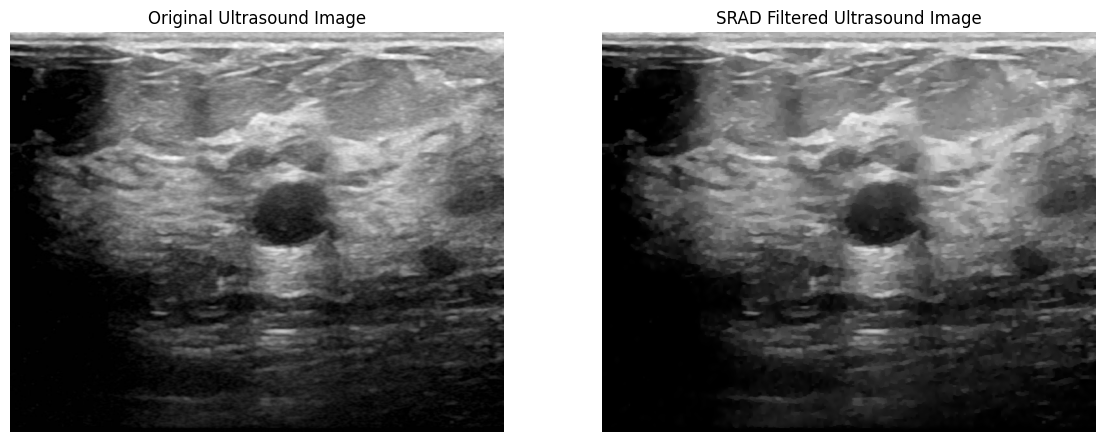

In [7]:

plt.figure(figsize=(14, 7))

# 원본 초음파 이미지
plt.subplot(1, 2, 1)
plt.imshow(us_image, cmap='gray')
plt.title("Original Ultrasound Image")
plt.axis('off')

# SRAD 필터링 적용 이미지
plt.subplot(1, 2, 2)
plt.imshow(srad_filtered_image, cmap='gray')
plt.title("SRAD Filtered Ultrasound Image")
plt.axis('off')

plt.show()
